# Hands-on: The perceptron

The perceptron is a primitive neural network that weights its input linearly, and outputs +1 or -1 depending on results.

This notebook provides a set of functions that define a fully functioning perceptron.

We want to remove any existing smell!

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Perceptron definition

The following functions are all that is needed to create, train, and use a perceptron.

In [5]:
def initialize_params(n_features, random_state=np.random):
    """ Initialize the parameters of a perceptron with random weights. """
    bias = 0.0
    weights = random_state.randn(n_features) * 0.001
    return weights, bias


def update(weights, bias, learning_rate, X, y):
    """ Single update to the perceptron to perdict target `y` from input `X`.
    
    Returns
    -------
    weights : 1D numpy array
        Updated weights of the perceptron.
    bias: float
        Updated constant bias.
    cost: float
        Current training sum-of-squares error cost.
    """
    # Compute activation with current parameters, and compute the error.
    output = activation(weights, bias, X)
    errors = y - output

    # Update parameters to improve prediction.
    weights = weights + learning_rate * X.T.dot(errors)
    bias = bias + learning_rate * errors.sum()

    # Measure sum-of-squares error cost.
    cost = (errors ** 2).sum() / 2.0

    return weights, bias, cost


def train(weights, bias, learning_rate, n_iterations, X, y):
    """ Train the perceptron to perdict target `y` from input `X`.
    
    Returns
    -------
    weights : 1D numpy array
        Updated weights of the perceptron.
    bias: float
        Updated constant bias.
    costs: list of floats
        Training sum-of-squares error costs, one for each iteration.
    """
    costs = []
    for idx in range(n_iterations):
        weights, bias, cost = update(weights, bias, learning_rate, X, y)
        costs.append(cost)
    return weights, bias, costs


def activation(weights, bias, X):
    """ Compute linear activation for output layer. """
    return np.dot(X, weights) + bias


def predict(weights, bias, X):
    """ Predict class label from input `X`. """
    return np.where(activation(weights, bias, X) >= 0.0, 1, -1)


## Example use of the perceptron 

We load the "Iris" dataset, where we need to predict the species of an Iris flower based on the petal and sepal length and witdth.

In [6]:
from sklearn import datasets

iris = datasets.load_iris()

# A few uninteresting steps to reduce the problem to 2 species, and recode the target labels to +1 and -1
two_classes_mask = iris.target < 2
X = iris.data[two_classes_mask]
y = iris.target[two_classes_mask]
y[y==0] = -1

We split the data in a training and test set.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=678)

The next block plots the training data, colored by Iris species. Test data is markes as empty circles.

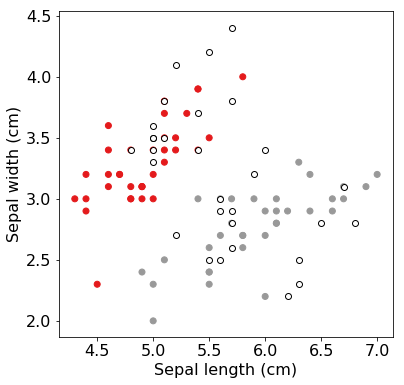

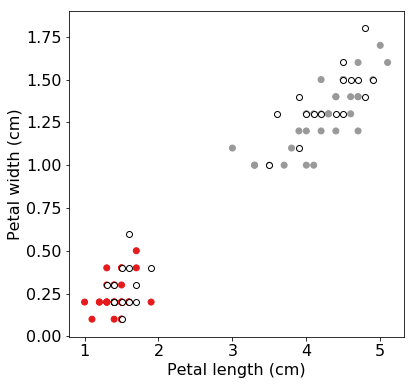

In [24]:
with plt.rc_context(rc={'figure.figsize': (6, 6), 'font.size': 16}):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c='white', marker='o', edgecolors='k')
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())
    plt.show()

    plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap=plt.cm.Set1)
    plt.scatter(X_test[:, 2], X_test[:, 3], c='white', marker='o', edgecolors='k')
    plt.xlabel(iris.feature_names[2].capitalize())
    plt.ylabel(iris.feature_names[3].capitalize());


Next we train a perceptron to predict the Iris species.

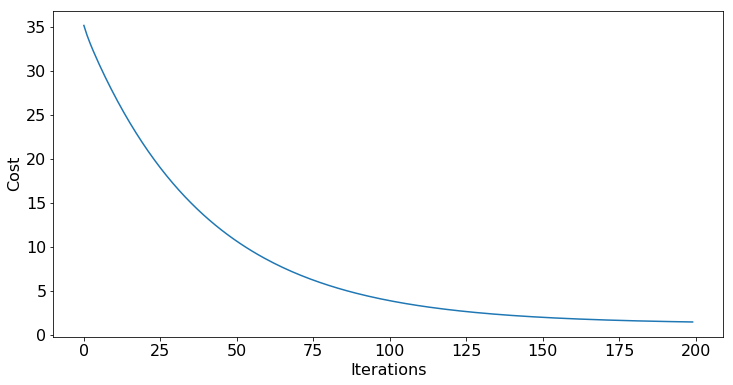

In [26]:
random_state = np.random.RandomState(783838)

weights , bias = initialize_params(n_features=X.shape[1], random_state=random_state)

learning_rate = 0.0001
n_iterations = 200
weights, bias, costs = train(weights, bias, learning_rate, n_iterations, X_train, y_train)

with plt.rc_context(rc={'figure.figsize': (12, 6), 'font.size': 16}):
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

Finally, we predict use the perceptron to predict the species for the test data, and plot the results.

We plot a green circle around a point if it was predicted correctly, and a red one if not.

In [30]:
predicted = predict(weights, bias, X_test)
correct = predicted == y_test
print('Number of errors:', len(y_test) - correct.sum())


Number of errors: 0


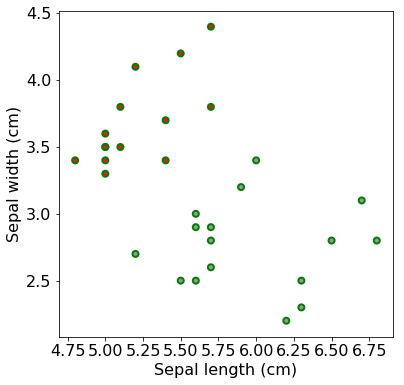

In [31]:
marker = np.where(correct, 'o', 'x')
with plt.rc_context(rc={'figure.figsize': (6, 6), 'font.size': 16}):
    plt.scatter(X_test[correct, 0], X_test[correct, 1], c=y_test[correct], 
                cmap=plt.cm.Set1, marker='o', edgecolors='g', linewidths=2.0)
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())

    plt.scatter(X_test[~correct, 0], X_test[~correct, 1], c=y_test[~correct], 
                marker='o', edgecolors='r')
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())
